In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Daten

Datensatz importieren

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/daten/main/statistik/08-5-observed-expected-homicides-x.csv')

Datenüberblick

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0    dailyNumberOfRecordedHomicideIncidents  16 non-null     object
 1   FiguresType                              16 non-null     object
 2   Occurences                               16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [4]:
df.head()

,dailyNumberOfRecordedHomicideIncidents,FiguresType,Occurences
0,0,ExpectedFigures,264
1,1,ExpectedFigures,376
2,2,ExpectedFigures,267
3,3,ExpectedFigures,127
4,4,ExpectedFigures,45


In [5]:
df.tail()

,dailyNumberOfRecordedHomicideIncidents,FiguresType,Occurences
11,3,ObservedFigures,131
12,4,ObservedFigures,40
13,5,ObservedFigures,13
14,6,ObservedFigures,3
15,7 or more,ObservedFigures,0


Datenformat anpassen

In [17]:
df["dailyNumberOfRecordedHomicideIncidents"] = df[" dailyNumberOfRecordedHomicideIncidents"].astype("category")

# Analyse

Daten sortieren (für die folgenden Analysen)

In [20]:
df = df.sort_values("dailyNumberOfRecordedHomicideIncidents", ascending=True)

In [21]:
df

,dailyNumberOfRecordedHomicideIncidents,FiguresType,Occurences,dailyNumberOfRecordedHomicideIncidents
0,0,ExpectedFigures,264,0
8,0,ObservedFigures,259,0
1,1,ExpectedFigures,376,1
9,1,ObservedFigures,387,1
2,2,ExpectedFigures,267,2
10,2,ObservedFigures,261,2
3,3,ExpectedFigures,127,3
11,3,ObservedFigures,131,3
4,4,ExpectedFigures,45,4
12,4,ObservedFigures,40,4


In [28]:
df.groupby("FiguresType").mean("Occurences")

,Occurences
FiguresType,
ExpectedFigures,137.00
ObservedFigures,136.75


## Balkendiagramm

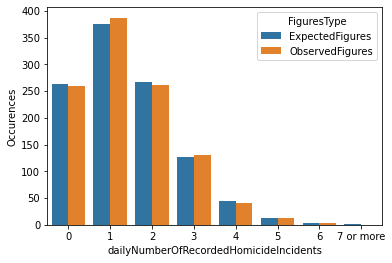

In [24]:
sns.barplot(
    data=df, 
    x="dailyNumberOfRecordedHomicideIncidents", 
    y="Occurences", 
    hue="FiguresType");

In [31]:
from scipy.stats import poisson

mu = 1,41
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

array([ 1., 41.])